## EDA, PROCESSING, CLUSTERING on NYC_CURRENT_JOB_POSTING DATA SET
### Objective
1. What are the highest paid Skills in the US market?
2. What are the job categories, which involve above mentioned niche skills?
3. Applying clustering concepts, please depict visually what are the different salary ranges based 
4. on job category and years of experience.**

### Following key points work has done
1. Write a Data Science Proposal for achieving the objective mentioned.
2. Perform exploratory analysis on the data.
3. Perform data wrangling / pre-processing.
4. Apply any 2 features engineering technique.
5. Plot top 10 features.
6. Identification of the performance parameters to be improved, for the given problem statement.
7. Design Machine learning models – Logistic regression and Decision tree to predict.
8. Compare the performance of selected feature engineering techniques.
9. Compare the performance of the 2 classifiers – Logistic regression and Decision tree to predict.
10. Present the conclusions/results in the format shared.

### 1. Write a Data Science Proposal for achieving the objective mentioned.
### Folloing points has added for data science proposal
1. The Team
2. Problem Statement and Background
3. The Data Source(s) has Used
4. Goals of Analysis
5. Data Analysis Tools and plan has used
6. Data Products and visualization

### Following Libraries has imported and used in this project

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
import palettable
init_notebook_mode(connected=True)  
plt.style.use('ggplot')
from geopy.geocoders import Nominatim
import plotly_express as px
import folium
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
import geopandas as gpd
import plotly.figure_factory as ff
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import word2vec
import nltk
from collections import Counter
from wordcloud import WordCloud
from PIL import Image
import urllib.request
import random
import os
from palettable.colorbrewer.sequential import Greens_9, Greys_9, Oranges_9, PuRd_9

In [179]:
# Reading data set from current directory
print(os.getcwd())
THIS_FOLDER = os.path.dirname(os.path.dirname(__dir__))
print(THIS_FOLDER)
input_file = os.path.join(THIS_FOLDER+"\Inputfiles", 'inputPS9.txt')

print(os.listdir("D:\PERSONAL_DETAILS_\BITS_PILLANI_MTECH\MTECH_DSE_SEM_CLASS_STUDY\SEMESTER-2\PPT_VIDEO_LECTURE\S1-20_DSECL_IDS_SEC_2 WILP Session\Assignment-1"))
data = pd.read_csv("D:\PERSONAL_DETAILS_\BITS_PILLANI_MTECH\MTECH_DSE_SEM_CLASS_STUDY\SEMESTER-2\PPT_VIDEO_LECTURE\S1-20_DSECL_IDS_SEC_2 WILP Session\Assignment-1/nyc-jobs_dataset.csv")

C:\Users\kdevanand


NameError: name '__dir__' is not defined

##### So, reading head of data from nyc-jobs_dataset.csv dataset
##### EDA of dataset

In [129]:
data.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-12-17T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-12-17T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-12-17T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-12-17T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-12-17T00:00:00.000


### 2. Perform exploratory analysis on the data.
##### We can see the some values of the data, are nan. It means data is not clean, we must clean the data to use this data in algorithms such as machine learning algorithms. The cleaning data can be challenging. Let's look at the data information to find, how many value is missed.

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         2946 non-null   int64  
 1   Agency                         2946 non-null   object 
 2   Posting Type                   2946 non-null   object 
 3   # Of Positions                 2946 non-null   int64  
 4   Business Title                 2946 non-null   object 
 5   Civil Service Title            2946 non-null   object 
 6   Title Code No                  2946 non-null   object 
 7   Level                          2946 non-null   object 
 8   Job Category                   2944 non-null   object 
 9   Full-Time/Part-Time indicator  2751 non-null   object 
 10  Salary Range From              2946 non-null   float64
 11  Salary Range To                2946 non-null   float64
 12  Salary Frequency               2946 non-null   o

##### We can easily see the how many number of data is empty. For example, Recruitment Contact column has 0 non-null object. It means this column is completely empty. We can't use this column. so starting to clean data.

In [131]:
data.drop(columns="Recruitment Contact",axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         2946 non-null   int64  
 1   Agency                         2946 non-null   object 
 2   Posting Type                   2946 non-null   object 
 3   # Of Positions                 2946 non-null   int64  
 4   Business Title                 2946 non-null   object 
 5   Civil Service Title            2946 non-null   object 
 6   Title Code No                  2946 non-null   object 
 7   Level                          2946 non-null   object 
 8   Job Category                   2944 non-null   object 
 9   Full-Time/Part-Time indicator  2751 non-null   object 
 10  Salary Range From              2946 non-null   float64
 11  Salary Range To                2946 non-null   float64
 12  Salary Frequency               2946 non-null   o

##### Pie/Donut Plots:

In [132]:
def pie_plot(labels, values, colors, title):
    fig = {
      "data": [
        {
          "values": values,
          "labels": labels,
          "domain": {"x": [0, .48]},
          "name": "Job Type",
          "sort": False,
 
            "marker": {'colors': colors},
          "textinfo":"percent+label",
          "textfont": {'color': '#FFFFFF', 'size': 10},
          "hole": .6,
          "type": "pie"
        } ],
        "layout": {
            "title":title,
            "annotations": [
                {
                    "font": {
                        "size": 25,

                    },
                    "showarrow": False,
                    "text": ""

                }
            ]
        }
    }
    return fig


##### Full Time Or Part Time?
###### This seems to be a broader question which we all seem to ask, so let's begin with this. For the given plot, hovering on the particular part would reveal more information.

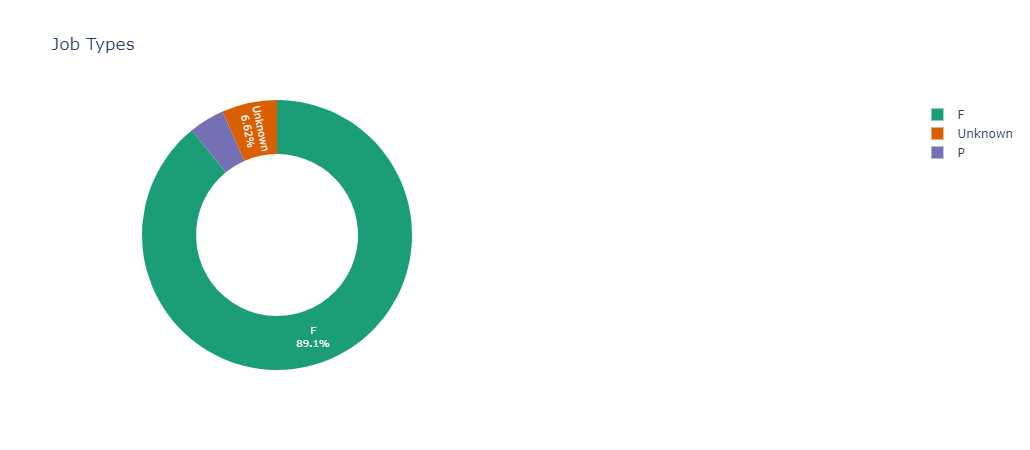

In [133]:
data['Full-Time/Part-Time indicator'].fillna("Unknown", inplace=True)
value_counts = data['Full-Time/Part-Time indicator'].value_counts()
labels = value_counts.index.tolist()
py.iplot(pie_plot(labels, value_counts, ['#1B9E77', '#D95F02', '#7570B3'], "Job Types"))

###### From the given plot, it can be observed, that the company is specifically looking for Full-Time employees mostly, with a minority of openings for Part time. There do seem to be some Unknown openings, broken data - it seems.

##### Salary Frequency
###### What is the majority salary frequency which all the jobs seem to offer? This plot seems to answer that question in brevity.

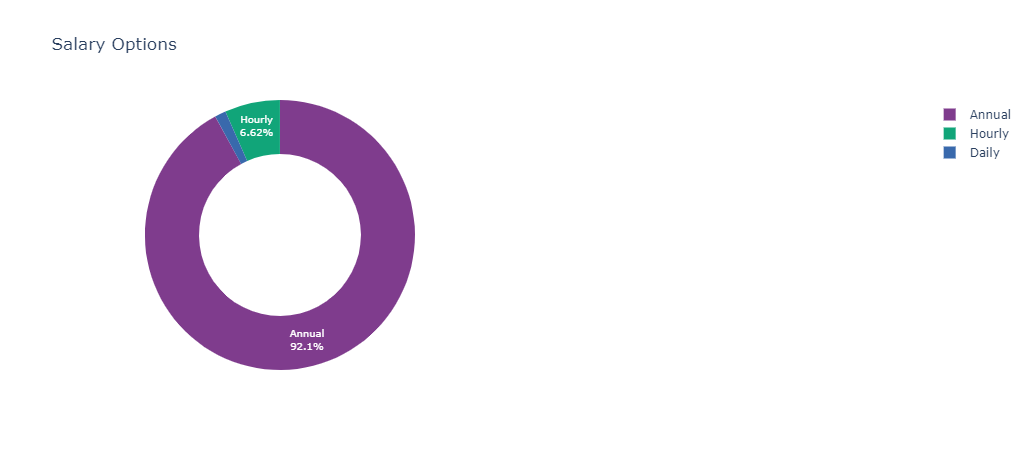

In [134]:
data['Salary Frequency'].fillna("Unknown", inplace=True)
value_counts = data['Salary Frequency'].value_counts()
labels = value_counts.index.tolist()
py.iplot(pie_plot(labels, value_counts, ['#7F3C8D', '#11A579', '#3969AC'], "Salary Options"))

###### This graph shows that most of the openings for the jobs seem to be on an annual term, with a slight minority in the field of hourly jobs. The spectrum for daily jobs seem to be really tiny, only 32 jobs for that field. Now, that's extremely less!

##### Posting Type
###### Usually there are two kinds of postings:

###### Internal: This kind of posting signifies that the job opening is visible to the employees for the current company only. Preferable if an employee is scouring for a promotion or planning a change from the current situation.
###### External: This kind of posting signifies that the job opening is available for the entire city and it's occupants, making the spectrum of employees a lot wider

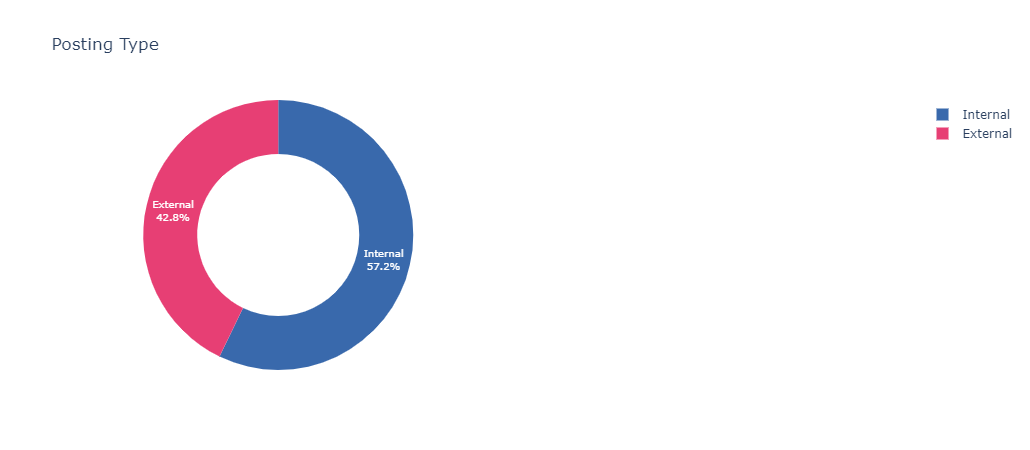

In [135]:
value_counts = data['Posting Type'].value_counts()
labels = value_counts.index.tolist()
py.iplot(pie_plot(labels, value_counts, ['#3969AC', '#E73F74'], "Posting Type"))

###### From the given plot, we infer that a slight majority of the openings are of internal type, i.e, only the employees of the current working company can see those postings and act upon it. In a way, this can be beneficial for the company, as they know that the employees applying for them already show the traits to belong to that company, and would be aware of the technology stack which is being used in the company.

###### Alas, this also means that the set of jobs for the unemployed got a lot less, so the competition just became a rat-race of a different kind.

##### Bar Plots
###### Highest High Salary Range
###### Nealry all job openings seem to have a range of salary they would offer, providing a spectrum from the least to the maximum. Let's try to decipher them by comparing them with Civil Service Titles

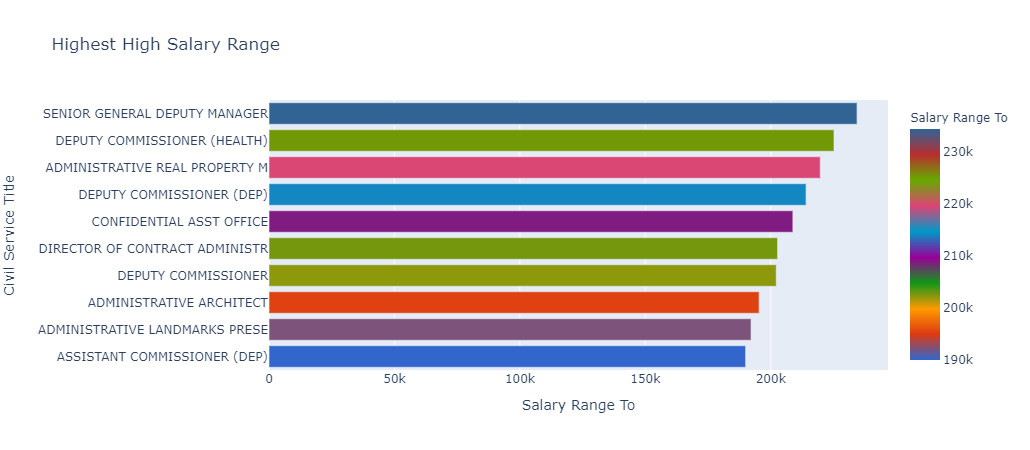

In [136]:
high_sal_range = (data.groupby('Civil Service Title')['Salary Range To'].mean().nlargest(10)).reset_index()

fig = px.bar(high_sal_range, y="Civil Service Title", x="Salary Range To", orientation='h', title = "Highest High Salary Range",color=  "Salary Range To", color_continuous_scale= px.colors.qualitative.G10).update_yaxes(categoryorder="total ascending")
fig.show()

###### It seems that Senior General Deputy Manager, in general, has the highest avergae salary range, ranging upto "$230,000 per year! Now that's an impressive amount"
###### Most of the openigns in the top ten highest salary seem to be from executive fields, or higher posts. These are the fields which rake in most of the money, on average, paving way for the high salaries people seem to hear about!

##### Highest Low Salary Ranges
###### With this, we seem to delve in the highest-least salary. Although it sounds like an oxymoron, it would give us an insight on which post holds the most promise for an applicant, for if the base if already high, it would be a lot more appealing than the roof-shattering salaries which are up and about in the world today.

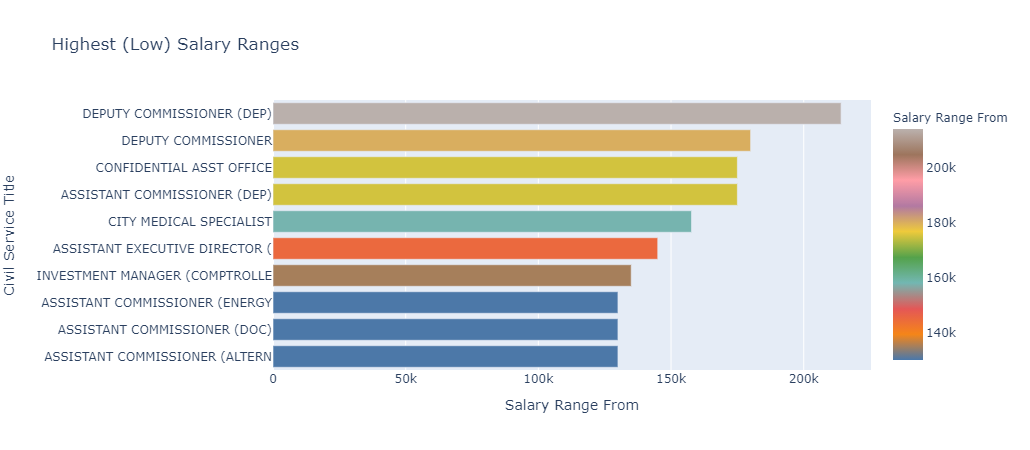

In [137]:
high_sal_range = (data.groupby('Civil Service Title')['Salary Range From'].mean().nlargest(10)).reset_index()

fig = px.bar(high_sal_range, y="Civil Service Title", x="Salary Range From", orientation='h', title = "Highest (Low) Salary Ranges",color=  "Salary Range From", color_continuous_scale= px.colors.qualitative.T10).update_yaxes(categoryorder="total ascending")

fig.show()

###### We can infer that Deputy Commisioner has the highest beginning salary range. Infact, through all the number of opening posts, it seems that this job has the same salary throughout. Talk about being consistent!

##### Max number of open positions
###### With this, we seem to embark upon which position has the most number of openings for the whole dataset.

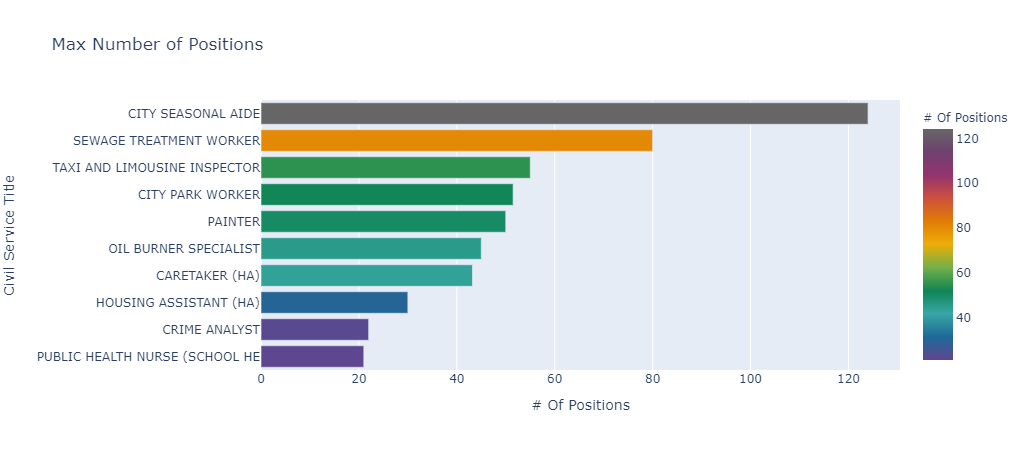

In [138]:
max_positions = (data.groupby('Civil Service Title')['# Of Positions'].mean().nlargest(10)).reset_index()

fig = px.bar(max_positions, y="Civil Service Title", x="# Of Positions", orientation='h', title = "Max Number of Positions",color=  "# Of Positions", color_continuous_scale= px.colors.qualitative.Prism).update_yaxes(categoryorder="total ascending")

fig.show()

###### We realise that a City Seasonal Aide and Sewage Treatment worker have the most number of openings, with the seasonal aide thrashing the other jobs easily with the most number of jobs open!

##### Which Work Units are the most popular?
###### Work Units or Divisions is the category in which most of the jobs fall under,

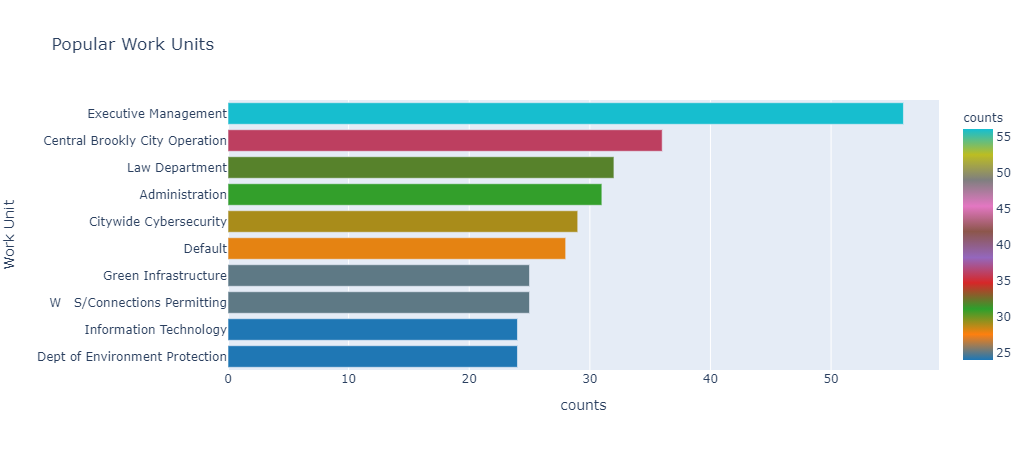

In [139]:
top_work_unitdf = data['Division/Work Unit'].value_counts().rename_axis('Work Unit').reset_index(name='counts')[:10]

fig = px.bar(top_work_unitdf, y="Work Unit", x='counts', orientation='h', title = "Popular Work Units",color=  "counts", color_continuous_scale=px.colors.qualitative.D3).update_yaxes(categoryorder="total ascending")

fig.show()

###### With this, we can gather that the Executive Management posts are the posts which seem to open the most, from time to time. It somehow seems to prove that the skill is less in number yet more in demand.

##### Distplot of Hourly Salary.

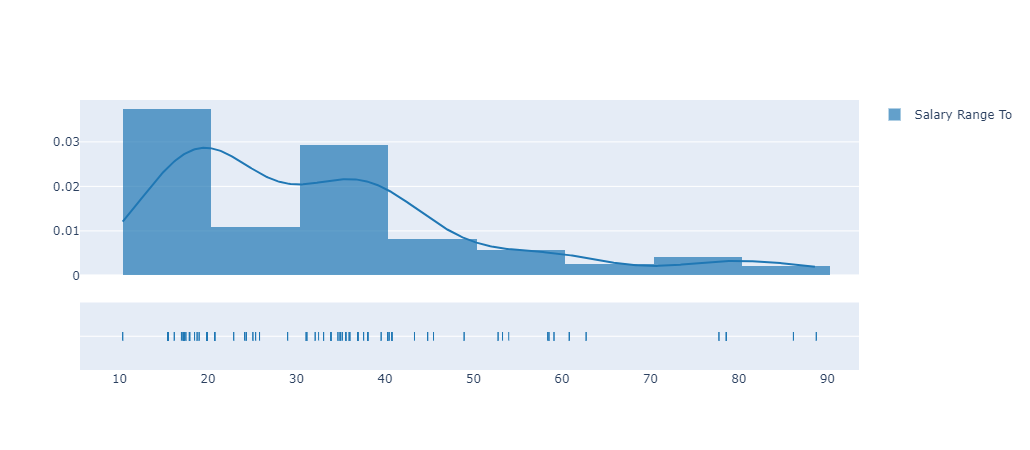

In [140]:
hourly = data[data['Salary Frequency']=='Hourly'][['Salary Range To']]
fig = ff.create_distplot([hourly['Salary Range To']], ['Salary Range To'], bin_size = 10)
fig.show()

##### With this distribution plot, we infer that the around 10 dollars seems to be the most popular number for the salary based per hour. And the max salary per hour seems to be around 88.5 dollars, making that a rather high pay for a job!

### 3. Perform data wrangling / pre-processing.
##### Now, we can look at the columns missing values in each row of our dataset

In [141]:
empty_values = {}
columns = data.columns
for col in columns:
    empty_values[col] = 0
    for val in data[col].values:
        val = str(val)
        if val == "NaN" or val == "Nan" or val == "nan":
            empty_values[col] += 1
print(empty_values)

{'Job ID': 0, 'Agency': 0, 'Posting Type': 0, '# Of Positions': 0, 'Business Title': 0, 'Civil Service Title': 0, 'Title Code No': 0, 'Level': 0, 'Job Category': 2, 'Full-Time/Part-Time indicator': 0, 'Salary Range From': 0, 'Salary Range To': 0, 'Salary Frequency': 0, 'Work Location': 0, 'Division/Work Unit': 0, 'Job Description': 0, 'Minimum Qual Requirements': 20, 'Preferred Skills': 393, 'Additional Information': 1092, 'To Apply': 1, 'Hours/Shift': 2062, 'Work Location 1': 1588, 'Residency Requirement': 4, 'Posting Date': 4, 'Post Until': 2075, 'Posting Updated': 4, 'Process Date': 4}


##### We found the all missing values for each columns of our data set. We may increase the understandability with using visualization. You know "a picture is worths lots of words".

Text(0.5, 1.0, 'Number of Missing Values for Each Column of Our Data Set')

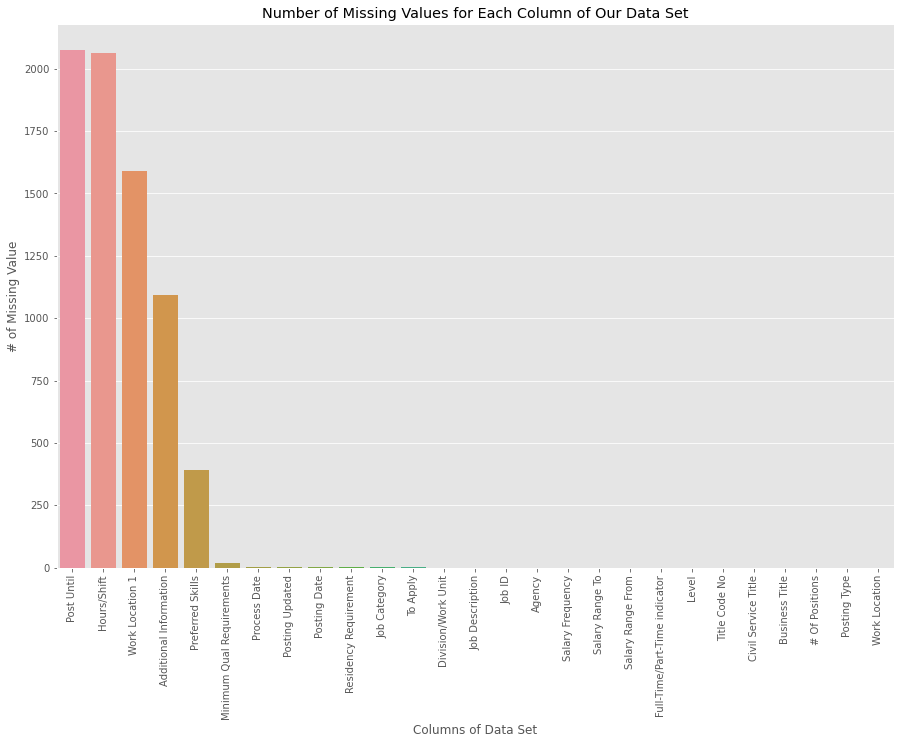

In [142]:
columns = [*empty_values.keys()]
number_of_missing_Values = [*empty_values.values()]

df = pd.DataFrame({"Columns of Data Set":columns,"# of Missing Values":number_of_missing_Values})
newIndex = (df["# of Missing Values"].sort_values(ascending = False)).index.values
sortedData = df.reindex(newIndex)

plt.figure(figsize = (15,10))
ax = sns.barplot(x = sortedData["Columns of Data Set"],y = sortedData["# of Missing Values"])
plt.xticks(rotation = 90)
plt.xlabel("Columns of Data Set")
plt.ylabel("# of Missing Value")
plt.title("Number of Missing Values for Each Column of Our Data Set")


##### The upper bar graph shows us our data is almost clean. But there is problems in some columns in our data set. Let's look at this bar graph again without columns which has 0 missing values.

Text(0.5, 1.0, 'Number of Missing Values for Each Column of Our Data Set')

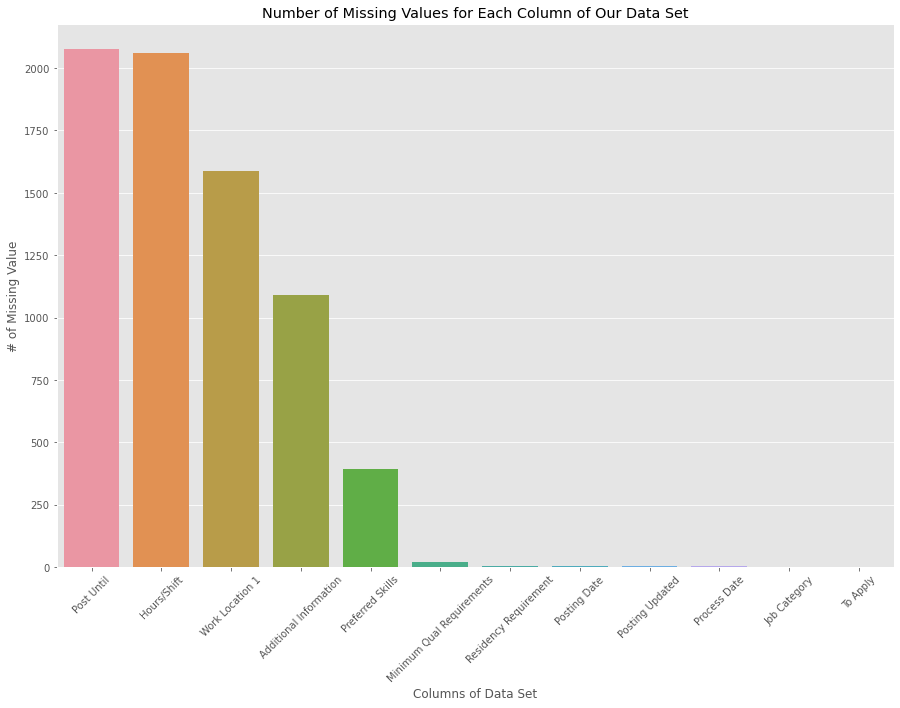

In [143]:
new_columns = []
new_values = []

for col,val in zip(columns,number_of_missing_Values):
    if val != 0:
        new_columns.append(col)
        new_values.append(val)

df = pd.DataFrame({"Columns of Data Set":new_columns ,"# of Missing Values":new_values})
newIndex = (df["# of Missing Values"].sort_values(ascending = False)).index.values
sortedData = df.reindex(newIndex)

plt.figure(figsize = (15,10))
ax = sns.barplot(x = sortedData["Columns of Data Set"],y = sortedData["# of Missing Values"])
plt.xticks(rotation = 45)
plt.xlabel("Columns of Data Set")
plt.ylabel("# of Missing Value")
plt.title("Number of Missing Values for Each Column of Our Data Set")


##### Concentrating above missing columns to clean the data.

In [144]:
for each in sortedData["Columns of Data Set"]:
    print(each+"---->")
    print("--------------------------")
    print(data[each].head())
    print("--------------------------")
    print()

Post Until---->
--------------------------
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Post Until, dtype: object
--------------------------

Hours/Shift---->
--------------------------
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Hours/Shift, dtype: object
--------------------------

Work Location 1---->
--------------------------
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Work Location 1, dtype: object
--------------------------

Additional Information---->
--------------------------
0    Salary range for this position is: $42,405 - $...
1                                                  NaN
2    1.  A Motor Vehicle Driverâ€™s License valid i...
3    1.  A Motor Vehicle Driverâ€™s License valid i...
4    SPECIAL NOTE:    1.  This is a temporary assig...
Name: Additional Information, dtype: object
--------------------------

Preferred Skills---->
--------------------------
0    â€¢\tExcellent interpersonal and organizationa...
1                                     

##### Number Of Positions feature closer.

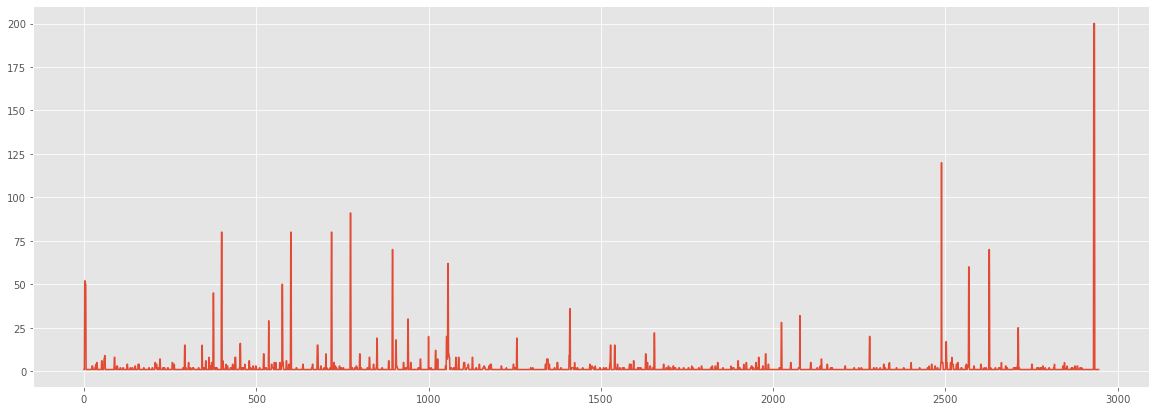

In [145]:
plt.figure(figsize = (20,7))
plt.plot(data["# Of Positions"])
plt.show()

We can replace the nan values with median of the data for # of Positions feature.


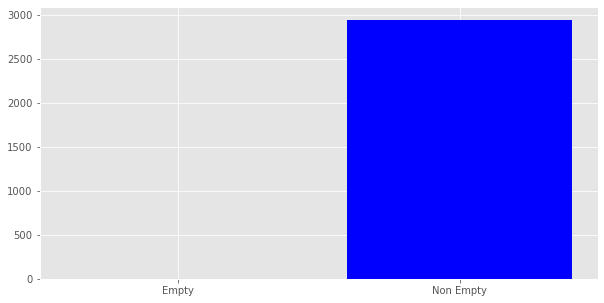

In [146]:
data["# Of Positions"].fillna(data["# Of Positions"].median(),inplace = True)
cnt_x = 0
cnt_y = 0
for each in data["# Of Positions"]:
    if str(each) == "nan":
        cnt_x += 1
    else:
        cnt_y += 1

plt.figure(figsize = (10,5))
plt.bar(x = "Empty",height = cnt_x,color ="red")
plt.bar(x = "Non Empty",height = cnt_y,color ="blue")
plt.show()

###### There is no empty values in # of Positions feature anymore. Okay let's start to explore the data, Firsly, let's look at the relationship with Business Title and # Of Positions.

### 4. Apply any 2 features engineering technique.

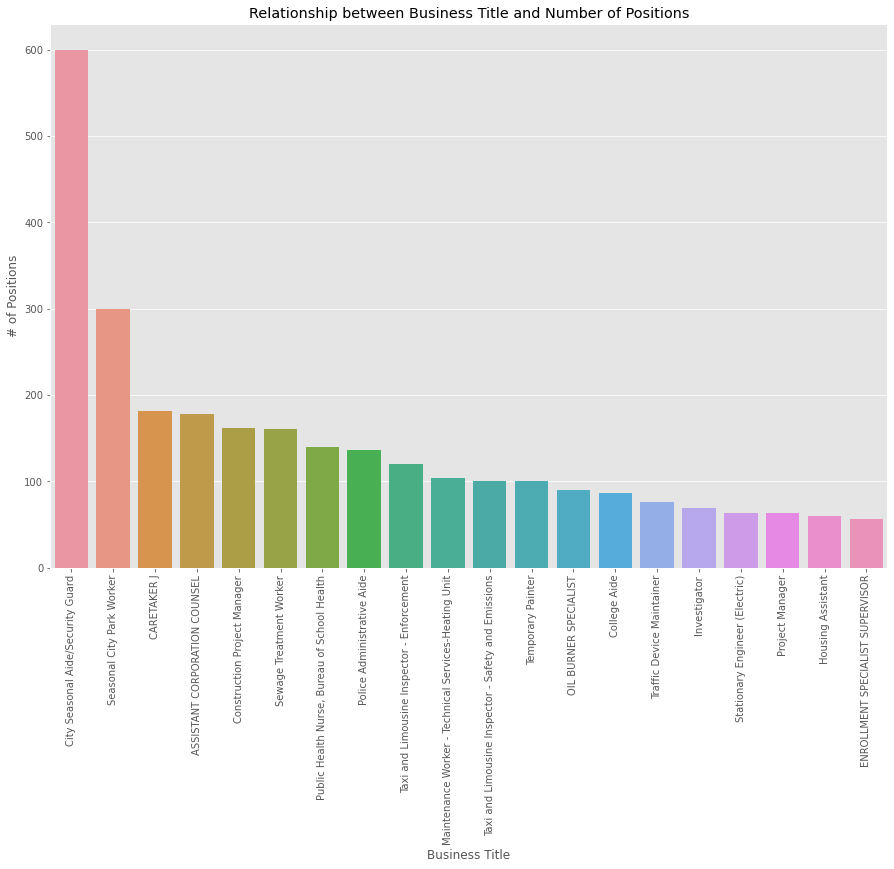

In [147]:
number_of_position = {}
for title,np in zip(data["Business Title"],data["# Of Positions"]):
    if title in number_of_position.keys():
        number_of_position[title] += np
    else:
        number_of_position[title] = np
        
columns = [*number_of_position.keys()]
positions = [*number_of_position.values()]

df = pd.DataFrame({"Business Title":columns,"# of positions":positions})
newIndex = (df["# of positions"].sort_values(ascending = False)).index.values
sortedData = df.reindex(newIndex)

plt.figure(figsize = (15,10))
ax = sns.barplot(x = sortedData["Business Title"][0:20],y = sortedData["# of positions"])
plt.xticks(rotation = 90)
plt.xlabel("Business Title")
plt.ylabel("# of Positions")
plt.title("Relationship between Business Title and Number of Positions")        
plt.show()


##### After that, we'll look at frequency of each agency in our data set. Then we'll visualize that.

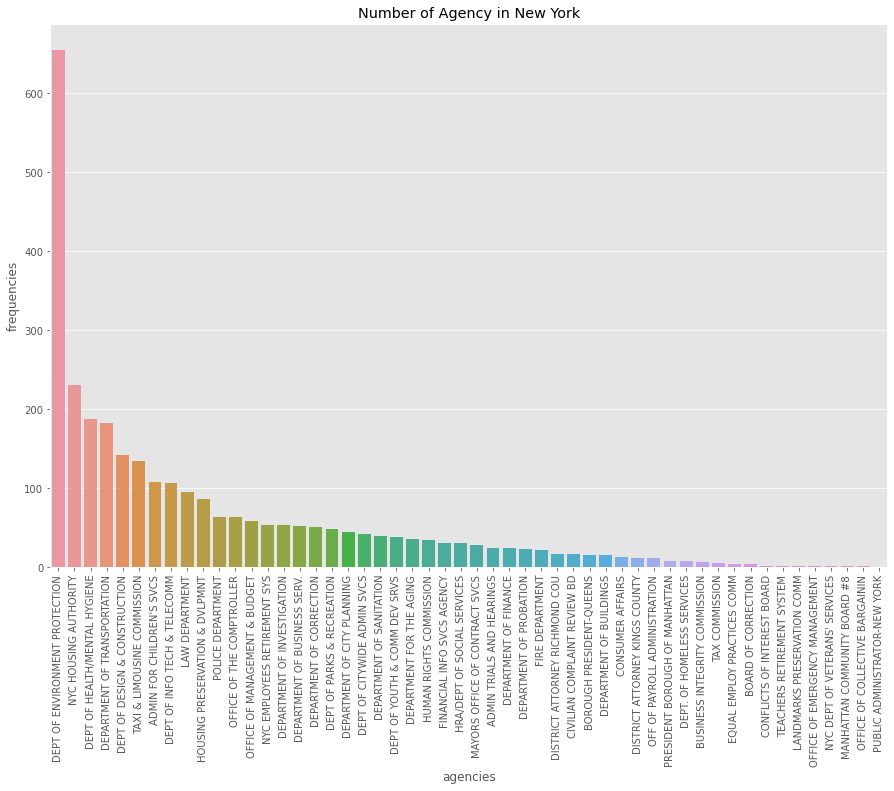

In [148]:
agencies = data["Agency"].unique()
freq_Of_agencies = []
for agency in agencies:
    count = len(data[data["Agency"] == agency])
    freq_Of_agencies.append(count)

df = pd.DataFrame({"agency":agencies,"freq":freq_Of_agencies})
newIndex = (df["freq"].sort_values(ascending = False)).index.values
sortedData = df.reindex(newIndex)

plt.figure(figsize = (15,10))
ax = sns.barplot(x = sortedData["agency"],y = sortedData["freq"])
plt.xticks(rotation = 90)
plt.xlabel("agencies")
plt.ylabel("frequencies")
plt.title("Number of Agency in New York")
plt.show()


##### Finally ,we can search the relationship with salary range and # of positions. 

<Figure size 1080x720 with 0 Axes>

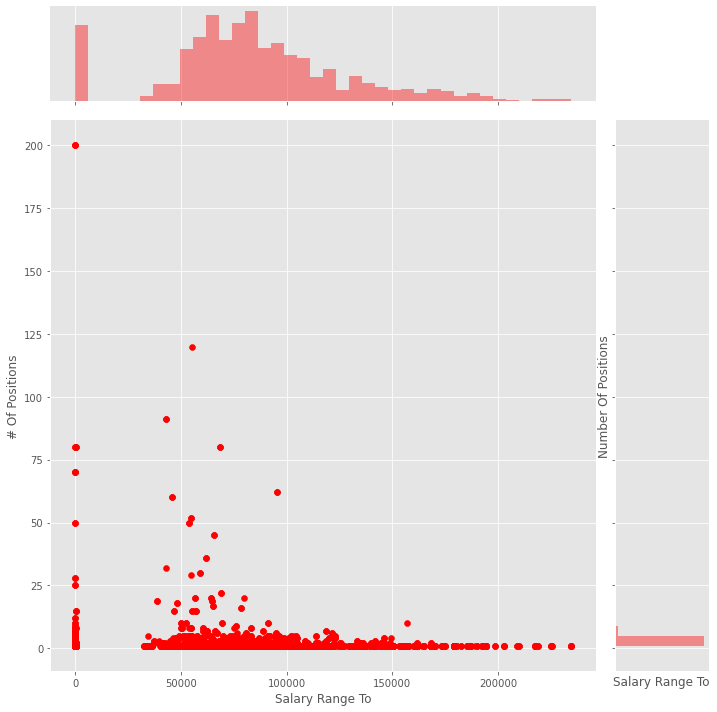

In [149]:
plt.figure(figsize=(15,10))
sns.jointplot(data["Salary Range To"],data["# Of Positions"],height=10,color="r")
plt.xlabel("Salary Range To")
plt.ylabel("Number Of Positions")
plt.show()

### 5. Plot top 10 features

##### Top 10 Job Openings via Category

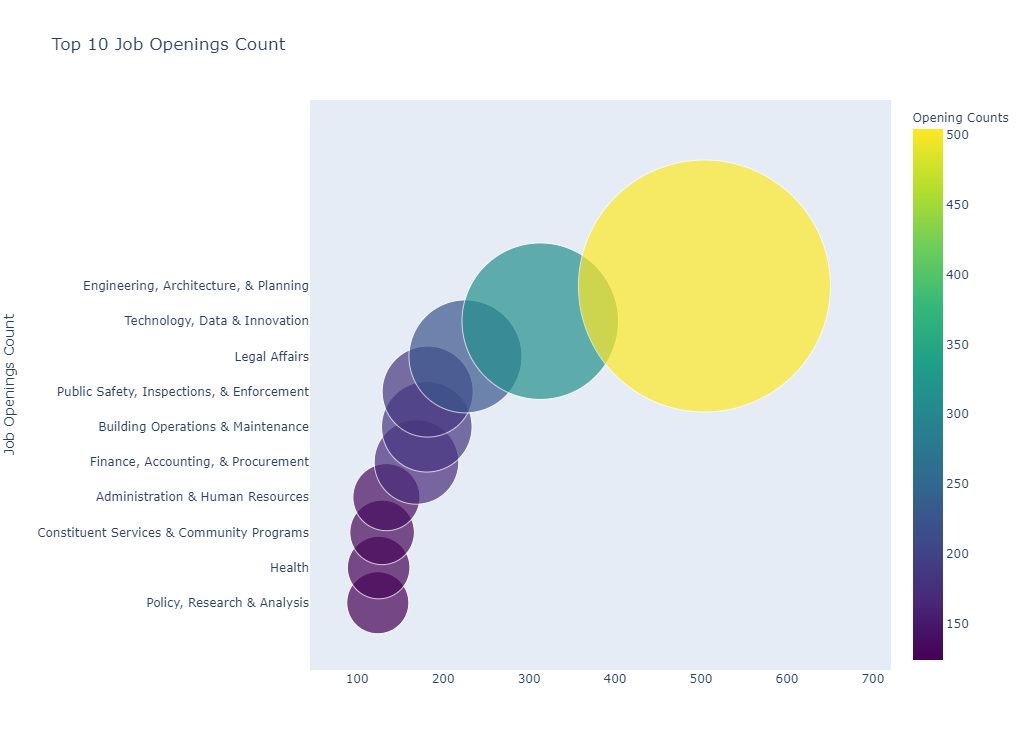

In [150]:
job_categorydf = data['Job Category'].value_counts(sort=True, ascending=False)[:10].rename_axis('Job Category').reset_index(name='Counts')
job_categorydf = job_categorydf.sort_values('Counts')

trace = go.Scatter(y = job_categorydf['Job Category'],x = job_categorydf['Counts'],mode='markers',
                   marker=dict(size= job_categorydf['Counts'].values/2,
                               color = job_categorydf['Counts'].values,
                               colorscale='Viridis',
                               showscale=True,
                               colorbar = dict(title = 'Opening Counts')),
                   text = job_categorydf['Counts'].values)

dataVal = [(trace)]

layout= go.Layout(autosize= False, width = 1000, height = 750,
                  title= 'Top 10 Job Openings Count',
                  hovermode= 'closest',
                  xaxis=dict(showgrid=False,zeroline=False,
                             showline=False),
                  yaxis=dict(title= 'Job Openings Count',ticklen= 2,
                             gridwidth= 5,showgrid=False,
                             zeroline=True,showline=False),
                  showlegend= False)

fig = go.Figure(data=dataVal, layout=layout)
py.iplot(fig)

###### With this graph, we realise that Engineering, Architecture and Planning has the highest number of openings, at 510, trailed by technology and data at 323 openings. This just seems to highlight how technical skills seem to be in extremely high demand.

##### Top 10 engineering jobs by density

In [156]:
engineer=data[data['Job Category']=='Engineering, Architecture, & Planning'][['Business Title','coordinates']]
engineerdf = engineer['Business Title'].value_counts(sort=True, ascending=False)[:10].rename_axis('Business Title').reset_index(name='Counts')
engineerdf

,Business Title,Counts
0,Assistant Civil Engineer,29
1,Project Manager,16
2,Civil Engineer 2,12
3,Civil Engineer 3,11
4,Mechanical Engineer,8
5,Construction Project Manager,8
6,Deputy Director,8
7,Program Executive,6
8,Assistant Environmental Engineer,6
9,Senior Project Manager,6


###### We can see that Assistant Civil Engineer is the most in demand, followed by Engineer in Charge. Infact, amongst all of these, various levels of Civil Engineers seems to be the most in demand!

##### Top 10 Technology jobs by density.


In [169]:
technical=data[data['Job Category']=='Technology, Data & Innovation'][['Business Title','coordinates']]
techincaldf = technical['Business Title'].value_counts(sort=True, ascending=False)[:10].rename_axis('Business Title').reset_index(name='Counts')
techincaldf

,Business Title,Counts
0,COMPUTER SPECIALIST (SOFTWARE),12
1,Application Developer,6
2,COMPUTER SYSTEMS MANAGER,6
3,Business Analyst,4
4,E-Learning Content Developer (Per Diem),4
5,Quality Analyst Lead - Digital Solutions,4
6,CERTIFIED IT DEVELOPER (APPLICATIONS),4
7,WEB APPLICATION DEVELOPER,4
8,Network Administrator,3
9,Certified IT Developer (Applications) Level 3,3


###### We can see that Computer Software Specialist seems to be the most in demand, followed by a systems manager.

